In [1]:
import sys
import os

# assuming current working dir is …/src/company_researcher/agents
# step up two levels to land in …/src/
root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
if root not in sys.path:
    sys.path.insert(0, root)

In [2]:
from langchain_openai import ChatOpenAI
from company_researcher.core.agents import BackgroundInput, BackgroundAgent, FinancialHealthAgent, MarketPositionAgent, NewsAgent, TopicResearchAgent, TopicResearchInput
from company_researcher.core.api_clients.tavily_client import TavilyClient
from company_researcher.core.utils.llm_wrapper import LLMLoggingWrapper
from company_researcher.workflow.states import InputState, ResearchState
from langgraph.graph import StateGraph, END
import logging

c:\repos\company-researcher\.venv\Lib\site-packages\pydantic\_internal\_config.py:318: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
  warnings.warn(message, UserWarning)


In [3]:
background_agent = BackgroundAgent(llm=ChatOpenAI(model="gpt-4o", temperature=0.0), tavily_client=TavilyClient())

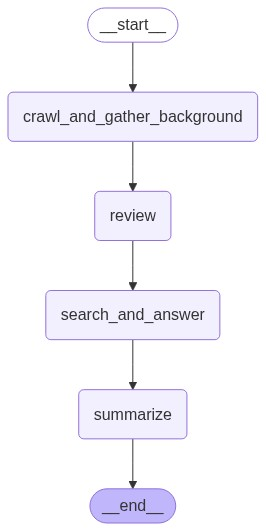

In [4]:
graph = background_agent.graph.compile()
graph

In [5]:
result = await graph.ainvoke(input=BackgroundInput(company_name="Dream", company_url="https://dreamgroup.com"))

In [9]:
for m in result["messages"]:
    print(m.pretty_print())

================================== Ai Message ==================================
Name: Researcher

Dream Security is a company operating in the cybersecurity industry, specifically focusing on defending governments and critical infrastructure against cyber threats. The company was founded in January 2023, inspired by a meeting between the CEO and a former European Prime Minister who had experienced a severe cyber crisis. This encounter led to the creation of a cybersecurity solution aimed at providing robust protection against modern cyberattacks.

Dream Security's mission is to empower governments and critical infrastructure with the necessary tools and intelligence to defend against nation-state cyber threats and ensure digital resilience. The company leverages its expertise in cyber intelligence to offer advanced, real-time protection, instant threat visibility, proactive risk mitigation, and full-spectrum defense to safeguard national security.

The company has strategic offices lo

In [3]:
#hint:
# class TopicResearchAgent:
#     def __init__(self,
#                  llm:ChatOpenAI,
#                  tavily_client:TavilyClient,
#                  topic_name:str,
#                  topic_description:str,
#                  max_steps:int):

financial_agent = TopicResearchAgent(
    llm=ChatOpenAI(
        model="gpt-4o",
        temperature=0.0,
    ),
    tavily_client=TavilyClient(),
    topic_name="Financial Analysis",
    topic_description="Analyze the financial performance of a company based on its latest earnings report and market trends.",
    max_steps=3,
)

In [4]:
graph = financial_agent.graph

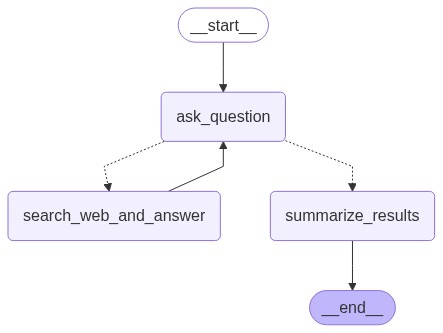

In [5]:
graph.compile()

In [6]:
company_input = TopicResearchInput(
    company_name="Tavily",
    company_background="A web search engine that provides real-time data and insights for LLMs."
)

In [7]:
work = graph.compile()
result = await work.ainvoke(company_input)

{'messages': [], 'company_name': 'Tavily', 'company_background': 'A web search engine that provides real-time data and insights for LLMs.'}
Search results: Query: Tavily latest earnings report
Snippet: Tavily's latest earnings report is not publicly available. Check the company's official website or financial news for updates. The most recent funding was $5.00M.
Results:
- Tavily - 2025 Company Profile, Funding & Competitors - Tracxn (https://tracxn.com/d/companies/tavily/__Zcz-EM5tIW4gjY1Ra8AeGMmlKGBLxXaBSXv2VK9IYDE)
  Snippet: Here is the latest report on Tavily's sector: Free. MarketingTech - Sector Report. Edition: January, 2025 (111 Pages) View all reports related to Tavily. View complete company profile of Tavily. Our Lite Plan Awaits you - Its Free! Sign up now to unlock full access to curated data. 4M+ Companies 212K+ Investors
  Score: 0.77
- Tavily 2025 Company Profile: Valuation, Funding & Investors - PitchBook (https://pitchbook.com/profiles/company/622135-63)
  Snippet: Ta

In [8]:
print(result)

{'messages': [AIMessage(content="1. Can you provide an overview of Tavily's latest earnings report? What were the key financial metrics and highlights?\n\n2. How has Tavily's revenue growth trended over the past few quarters, and what factors have contributed to this trend?\n\n3. What are the current market trends affecting Tavily's financial performance, particularly in the web search engine and LLM data insights sectors?\n\n4. How does Tavily's profitability compare to its competitors in the industry?\n\n5. What are the main cost drivers for Tavily, and how have they impacted the company's financial performance?\n\n6. Can you discuss Tavily's cash flow situation? How effectively is the company managing its cash and liquidity?\n\n7. How has Tavily's stock price reacted to the latest earnings report, and what are analysts' expectations for its future performance?\n\n8. What are the key risks and opportunities identified in Tavily's financial analysis?\n\n9. How is Tavily investing in t

In [9]:
for message in result["messages"]:
    print(message.pretty_print())

================================== Ai Message ==================================
Name: Interviewer

1. Can you provide an overview of Tavily's latest earnings report? What were the key financial metrics and highlights?

2. How has Tavily's revenue growth trended over the past few quarters, and what factors have contributed to this trend?

3. What are the current market trends affecting Tavily's financial performance, particularly in the web search engine and LLM data insights sectors?

4. How does Tavily's profitability compare to its competitors in the industry?

5. What are the main cost drivers for Tavily, and how have they impacted the company's financial performance?

6. Can you discuss Tavily's cash flow situation? How effectively is the company managing its cash and liquidity?

7. How has Tavily's stock price reacted to the latest earnings report, and what are analysts' expectations for its future performance?

8. What are the key risks and opportunities identified in Tavily's f

In [10]:
print("Final Result:", result['result'])

Final Result: As of my last update, there is limited publicly available information about Tavily's financial performance, as it is a relatively new company founded in 2023. Here is a general overview based on the available information:

1. **Earnings Report**: Tavily has not released a public earnings report. The company recently raised $5 million in funding, which is a significant milestone for its early-stage development.

2. **Revenue Growth**: Tavily has not reported any revenue figures, so there is no trend data available. The company is likely focusing on product development and market entry strategies.

3. **Market Trends**: Tavily operates in the AI-driven search engine sector, focusing on real-time data insights for large language models (LLMs). Key market trends include the growing demand for AI solutions and the need for accurate, real-time data to support AI applications.

4. **Profitability**: Specific profitability data for Tavily is not available. As a startup, Tavily ma